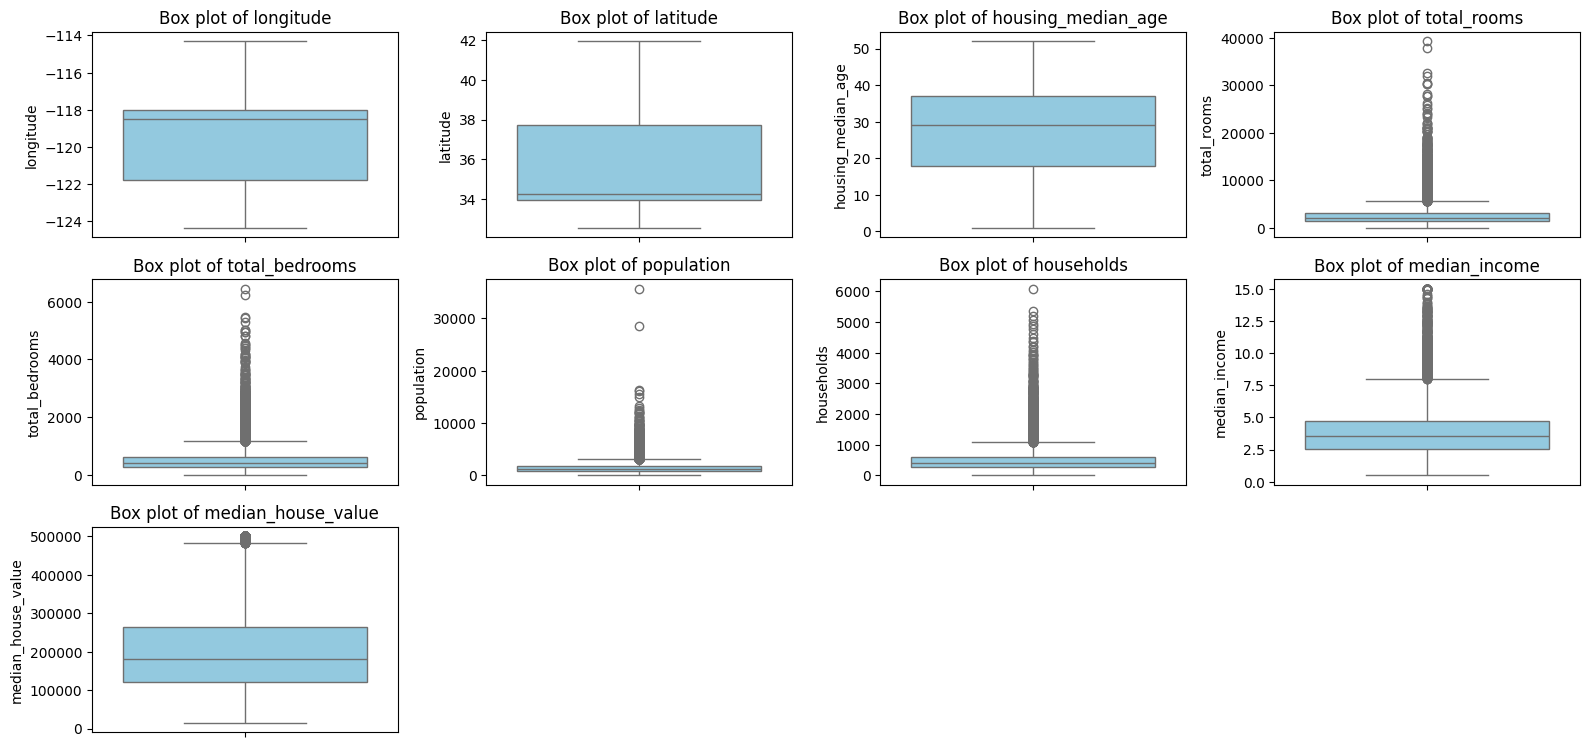

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Regression/housing.csv'
housing_data = pd.read_csv(file_path)

# Step 2: Create box plots for numerical columns to detect outliers
numerical_columns = housing_data.select_dtypes(include=['float64', 'int64']).columns #find column that have number

plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1): #starts a loop that goes through each column with numbers
    plt.subplot(4, 4, i)
    sns.boxplot(y=housing_data[column], color='skyblue')
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

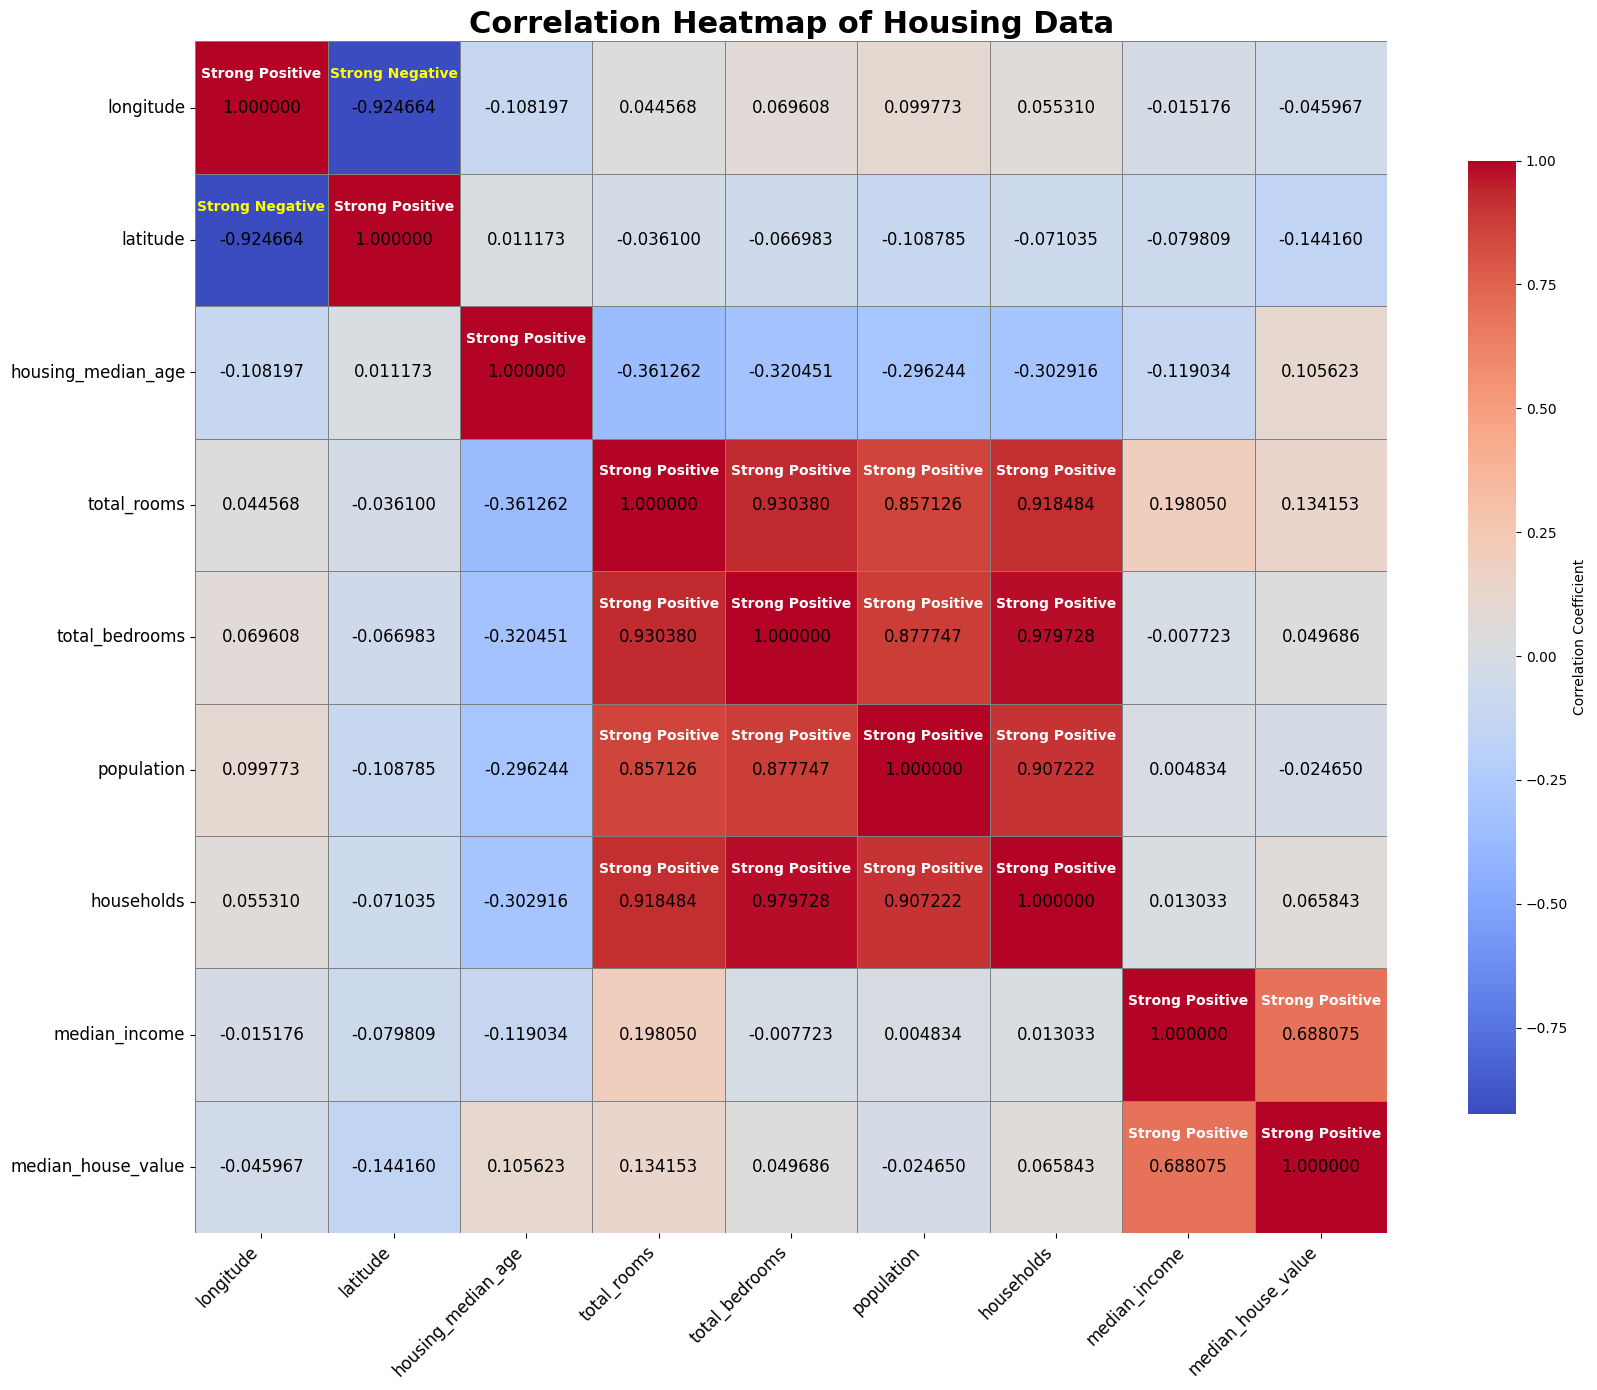

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Create a correlation heatmap
numerical_columns = [
    'longitude', 'latitude', 'housing_median_age', 
    'total_rooms', 'total_bedrooms', 'population', 
    'households', 'median_income', 'median_house_value'
]

# calculates how much each pair of columns are related to each other
correlation_matrix = housing_data[numerical_columns].corr()

# Set up the matplotlib figure with larger dimensions for better visibility
plt.figure(figsize=(18, 14))  

# Create a correlation heatmap with detailed customizations
sns.heatmap(
    correlation_matrix,
    annot=True,            # Display the correlation coefficients on the heatmap
    fmt=".6f",            
    cmap='coolwarm',      
    annot_kws={"size": 12, "color": 'black'},
    cbar=True,            # Show color bar for reference
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},  # Add a label to the color bar
    linewidths=.5,       # Lines between cells
    linecolor='grey',     
    square=True          
)

# Enhance the title and axis labels
plt.title('Correlation Heatmap of Housing Data', fontsize=22, fontweight='bold')  
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.yticks(rotation=0, fontsize=12)

# Add gridlines for clarity
plt.grid(False) 
plt.gca().xaxis.set_ticks_position('bottom') 
plt.gca().yaxis.set_ticks_position('left') 

# Add annotations for specific correlations with gravity below the values to avoid overlap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        if value > 0.5:  # High positive correlation
            plt.text(j + 0.5, i + 0.3, 'Strong Positive',  # Adjust 'y' position to avoid overlap with value
                     ha='center', va='bottom', fontsize=10, color='White', 
                     fontweight='bold')
        elif value < -0.5:  # High negative correlation
            plt.text(j + 0.5, i + 0.3, 'Strong Negative',  # Adjust 'y' position to avoid overlap with value
                     ha='center', va='bottom', fontsize=10, color='Yellow', 
                     fontweight='bold')

# Adjust layout to fit labels and title
plt.tight_layout()  
plt.show()  # Display the heatmap


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = 'C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Regression/housing.csv'
housing_data = pd.read_csv(file_path)

# Step 1: Handle Missing Values
median_total_bedrooms = housing_data['total_bedrooms'].median()
housing_data['total_bedrooms'] = housing_data['total_bedrooms'].fillna(median_total_bedrooms)

# Step 2: Remove Duplicates
housing_data_cleaned = housing_data.drop_duplicates()

# Step 3: Remove Outliers
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numerical_columns = housing_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
housing_data_no_outliers = remove_outliers(housing_data_cleaned, numerical_columns)

# Drop 'population' and 'households' columns
housing_data_no_outliers = housing_data_no_outliers.drop(columns=['population', 'households'])

# Step 4: One-Hot Encoding of 'ocean_proximity'
# Convert 'ocean_proximity' into separate columns and then drop the original 'ocean_proximity' column
ocean_proximity_dummies = pd.get_dummies(housing_data_no_outliers['ocean_proximity'], prefix='ocean_proximity', drop_first=False)
housing_data_no_outliers = pd.concat([housing_data_no_outliers, ocean_proximity_dummies], axis=1)
housing_data_no_outliers = housing_data_no_outliers.drop(columns=['ocean_proximity'])

# Convert True/False in 'ocean_proximity' dummy columns to 1 and 0
housing_data_no_outliers[ocean_proximity_dummies.columns] = housing_data_no_outliers[ocean_proximity_dummies.columns].astype(int)

# Step 5: Standardize Numerical Data (excluding 'median_house_value')
scaler = StandardScaler()
housing_data_standardized = housing_data_no_outliers.copy()

# Exclude 'median_house_value' from scaling
columns_to_scale = housing_data_no_outliers.select_dtypes(include=['float64', 'int64']).columns.difference(['median_house_value'])
housing_data_standardized[columns_to_scale] = scaler.fit_transform(housing_data_no_outliers[columns_to_scale])

# Save the cleaned, standardized, and encoded dataset
cleaned_file_path = 'C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Regression/cleaned_housing.csv'
housing_data_standardized.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned, standardized, and encoded dataset saved to {cleaned_file_path}")



Cleaned, standardized, and encoded dataset saved to C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Regression/cleaned_housing.csv
